3 groups of population:
* succeptible   dS/dt = -B * S * I
* innotvative to the idea  dI/dt = B * S * I - !I
* r fully adopted dR/dt = !I

SIR Model
===

* dS/dt = - beta * S * I
* dI/dt = beta * S * I - gamma * I
* dR/dt = gamma * I

Given that:
1. Beta and gamma constants
2. We knoe initial condtions

In [31]:
import numpy as np 
import matplotlib.pyplot as plt

In [32]:
def sir_model(t, S, I, beta, gamma):
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

We shall use runge-kutta method

In [33]:
def runge_kutta_4th_order_sir(f, t0, S0, I0, R0, beta, gamma, h, n_iters):
    # Init history
    t_values = [t0]
    S_values = [S0]
    I_values = [I0]
    R_values = [R0]

    for _ in range(n_iters):
        t = t_values[-1]
        S = S_values[-1]
        I = I_values[-1]
        R = R_values[-1]

        # Calculate k1
        k1_S, k1_I, k1_R = f(t, S, I, beta, gamma)

        # Calculate k2
        k2_S, k2_I, k2_R = f(t + h/2, S + h/2 * k1_S, I + h/2 * k1_I, beta, gamma)

        # Calculate k3
        k3_S, k3_I, k3_R = f(t + h/2, S + h/2 * k2_S, I + h/2 * k2_I, beta, gamma)

        # Calculate k4
        k4_S, k4_I, k4_R = f(t + h, S + h * k3_S, I + h * k3_I, beta, gamma)

        # Update system
        S_new = S + h/6 * (k1_S + 2*k2_S + 2*k3_S + k4_S)
        I_new = I + h/6 * (k1_I + 2*k2_I + 2*k3_I + k4_I)
        R_new = R + h/6 * (k1_R + 2*k2_R + 2*k3_R + k4_R)

        # Update history
        S_values.append(S_new)
        I_values.append(I_new)
        R_values.append(R_new)

        # Update time
        t_new = t + h
        t_values.append(t_new)
    
    return t_values, S_values, I_values, R_values
        

Application of solver and function
---

In [34]:
t0 = 0
S0 = 0.99
I0 = 0.01
R0 = 0.0

beta = 0.3 # strongness of idea (not that strong 0.3)
gamma = 0.01 # how much people beleibe it (not that much 0.01)

h = 0.1 # step size
n_iters = 1000

t, S, R, I = runge_kutta_4th_order_sir(sir_model, t0, S0, I0, R0, beta, gamma, h, n_iters)

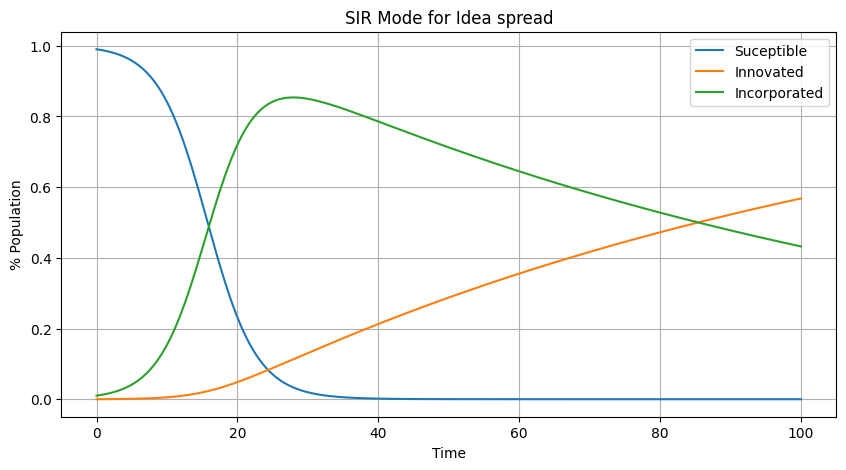

In [35]:
_ = plt.figure(figsize=(10, 5))
plt.plot(t, S, label='Suceptible')
plt.plot(t, I, label='Innovated')
plt.plot(t, R, label='Incorporated')
plt.xlabel('Time')
plt.ylabel('% Population')
plt.legend()
plt.title('SIR Mode for Idea spread')
plt.grid(True)
plt.show()
